# Практическая работа № 1. Предварительная обработка данных

Автор: Артём Макаров
Группа: КИ20-16/2б
Вариант 8

In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

from IPython.display import Image

In [97]:
df = pd.read_excel('first_practice_dataframe.xlsx')
df = df[['cat15_programmingLanguage',
         'cat4_income', 'num1_9', 'num2_9', 'num3_9']]
df2 = df.copy()
df

,cat15_programmingLanguage,cat4_income,num1_9,num2_9,num3_9
0,C++,"$40,001 - $50,000",38.394563,-310.892227,475.769166
1,C++,"$40,001 - $50,000",-9999.000000,-68.997463,333.541193
2,C++,"$40,001 - $50,000",441.196689,450.783312,450.809984
3,C++,"Below $30,001",210.914486,202.884884,442.997016
4,C++,-,-285.346725,NaN,376.479737
...,...,...,...,...,...
995,js,"$30,001 - $40,000",824.065303,426.900079,393.041594
996,C++,"Below $30,001",288.392553,1426.635214,258.163126
997,Java,"$30,001 - $40,000",-14.932614,471.835574,NaN
998,c,"Below $30,001",374.417925,480.725687,269.02597


## Задание 1, 2

Визуальный анализ данных. Построить визуальное представление для каждого столбца (признака) в исходном наборе данных. Провести анализ полученных диаграмм Примечание: для качественных переменных должны быть построены столбчатая и круговая диаграммы, для количественных переменных – гистограмма, оценка плотности распределения и диаграмма «ящик с усами».

Провести проверку правдоподобности исходных данных. Проверка правдоподобности исходных данных должна включать проверку типов исходных данных, лишних пропусков, невозможных значений и т.п. Привести найденные значения к нужному формату

### Обработка

In [98]:
def data_processing(data, column, dtype):
    """
    :param data: датафрейм
    :type data: pandas.core.frame.DataFrame
    :param column: название столбца
    :type column: string
    :param dtype: тип данных
    :type dtype: string
    :return: датафрейм
    :rtype: pandas.core.frame.DataFrame
    """
    data[column] = data[column].replace({'-': None})
    data[column] = data[column].replace({' ': None})
    data[column] = data[column].astype(dtype)
    if column == 'cat15_programmingLanguage':
        data[column] = data[column].replace({'c': 'C'})
    elif column == 'cat4_income':
        data[column] = data[column].replace({'below $30,001': 'Below $30,001'})
    if dtype == "float":
        data[column] = data[column].replace({-9999: np.nan})
    return data


df2 = data_processing(df2, 'cat15_programmingLanguage', "category")
df2 = data_processing(df2, 'cat4_income', "category")
df2 = data_processing(df2, 'num1_9', "float")
df2 = data_processing(df2, 'num2_9', "float")
df['num3_9'] = df['num3_9'].replace({'-': np.nan})
df['num3_9'] = df['num3_9'].replace({' ': np.nan})
df2['num3_9'] = df2['num3_9'].replace({'-': np.nan})
df2['num3_9'] = df2['num3_9'].replace({' ': np.nan})
df2 = data_processing(df2, 'num3_9', "float")
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   cat15_programmingLanguage  941 non-null    category
 1   cat4_income                941 non-null    category
 2   num1_9                     951 non-null    float64 
 3   num2_9                     952 non-null    float64 
 4   num3_9                     912 non-null    float64 
dtypes: category(2), float64(3)
memory usage: 25.9 KB


### Построение графиков

In [99]:
def graphs_for_categories(data, column):
    """
    :param data: датафрейм
    :type data: pandas.core.frame.DataFrame
    :param column: название столбца
    :type column: string
    :rtype: void
    """
    counts = Counter(data[column].dropna())
    plt.bar(counts.keys(), counts.values())
    plt.title(f'BarPlot для {column}')
    plt.xticks(rotation=25)
    plt.show()

    counts = Counter(data[column].dropna())
    plt.pie(counts.values(), labels=counts.keys())
    plt.title(f'PiePlot для {column}')
    plt.show()


def graphs_for_num(data, column):
    """
    :param data: датафрейм
    :type data: pandas.core.frame.DataFrame
    :param column: название столбца
    :type column: string
    :rtype: void
    """
    sns.histplot(data[column], kde=True, color='blue')
    plt.title(f'Гистограмма для {column}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()

    sns.boxplot(data=data[column])
    plt.title(f'Ящик с усами для {column}')
    plt.show()


#### До обработки данных

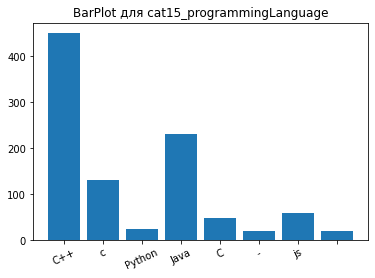

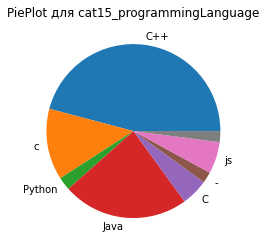

In [100]:
graphs_for_categories(df, 'cat15_programmingLanguage')

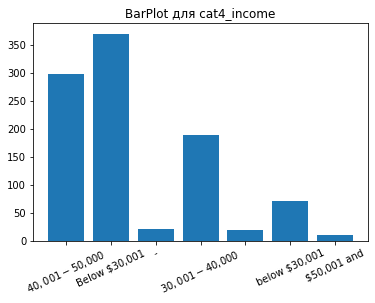

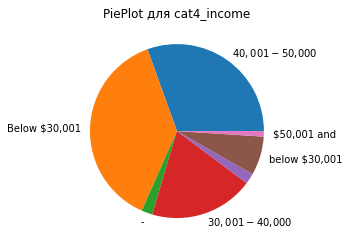

In [101]:
graphs_for_categories(df, 'cat4_income')

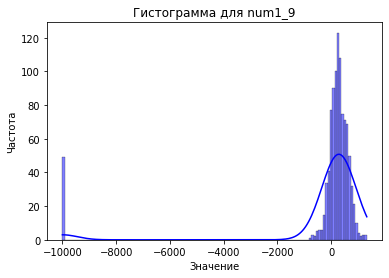

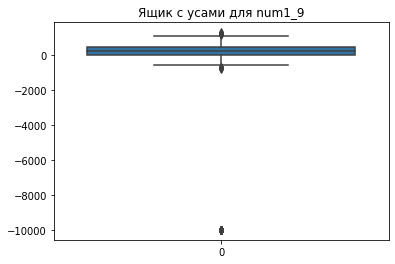

In [102]:
graphs_for_num(df, 'num1_9')

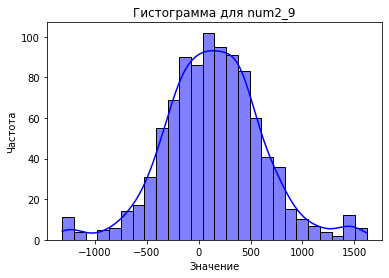

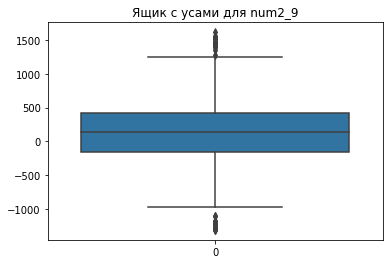

In [103]:
graphs_for_num(df, 'num2_9')

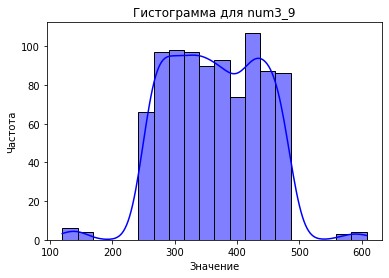

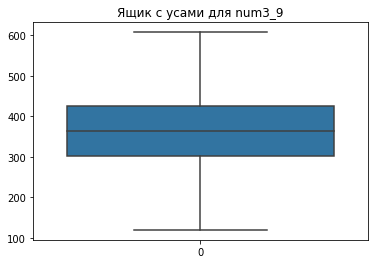

In [104]:
graphs_for_num(df, 'num3_9')

#### После обработки данных

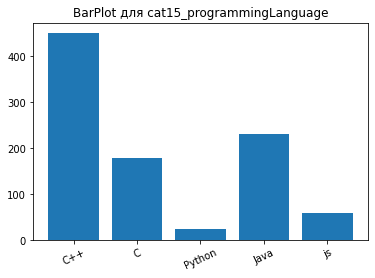

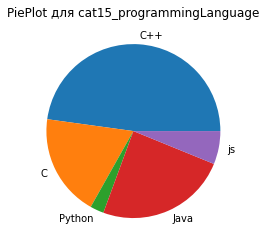

In [105]:
graphs_for_categories(df2, 'cat15_programmingLanguage')

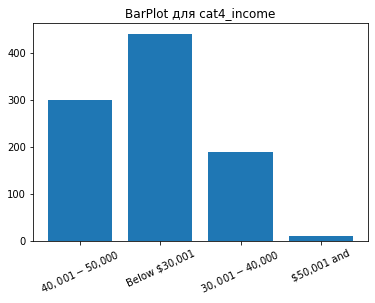

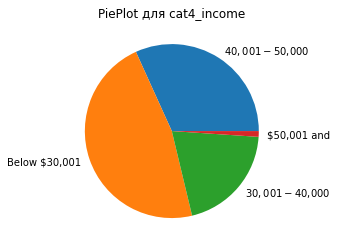

In [106]:
graphs_for_categories(df2, 'cat4_income')

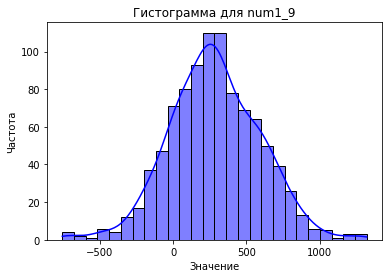

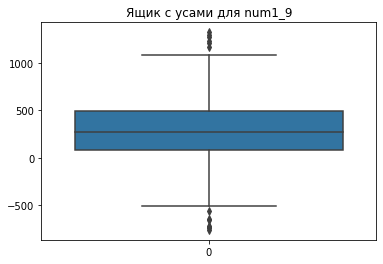

In [107]:
graphs_for_num(df2, 'num1_9')

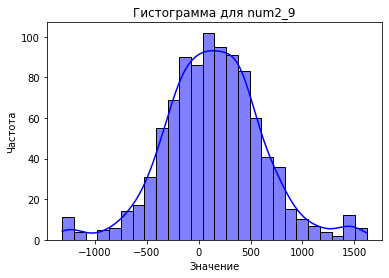

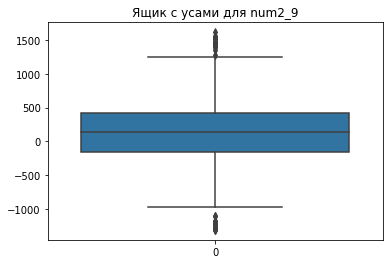

In [108]:
graphs_for_num(df2, 'num2_9')

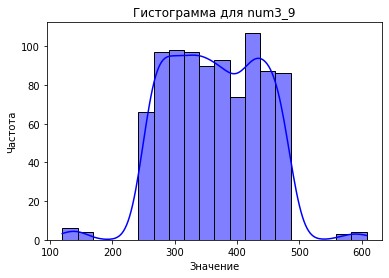

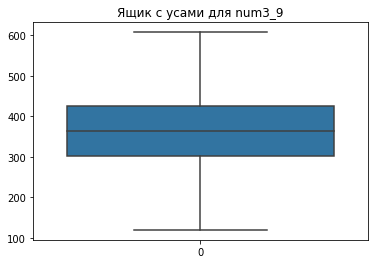

In [109]:
graphs_for_num(df2, 'num3_9')

## Задание 3. Поиск аномальных значений

Провести поиск значений в исходном наборе данных, резко отличающихся от других значений (выбросов). Строки с найденными выбросами удалить из исходного набора данных. Примечание: для поиска выбросов воспользоваться методом сигм (использовать готовую реализацию scipy.stats.sigmaclip) или метод квартилей (реализовать самостоятельно). Провести анализ полученных результатов. Использовать результаты очистки данных, полученных с помощью метода сигм.

### Метод квартилей

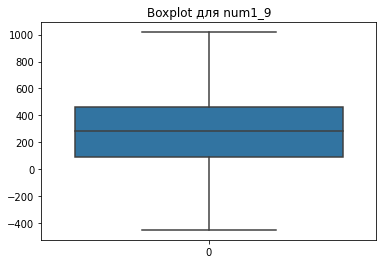

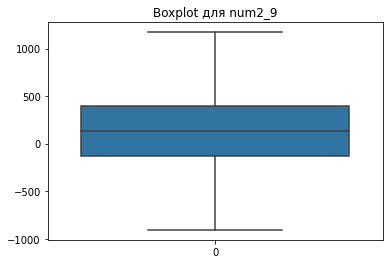

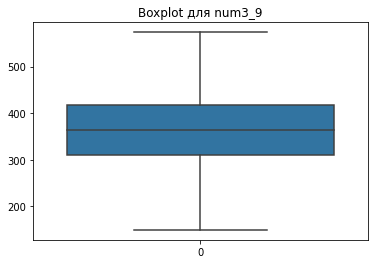

In [116]:
def finding_outliers(data, column):
    """
    :param data: датафрейм
    :type data: pandas.core.frame.DataFrame
    :param column: название столбца
    :type column: string
    :return: список с индексами выбросов
    :rtype: list
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    higher_fence = Q3 + 1.5 * IQR
    outlier_indexes = list()
    outlier_indexes.extend(
        data.index[(data[column] < lower_fence) | (data[column] > higher_fence)])
    return outlier_indexes


for column in ['num1_9', 'num2_9', 'num3_9']:
    outlier_indexes = finding_outliers(df2, column)
    df2 = df2.drop(outlier_indexes)
    sns.boxplot(data=df2[column])
    plt.title(f'Boxplot для {column}')
    plt.show()


## Задание 4. Поиск и восстановление пропущенных значений

Провести поиск пропущенных значений в исходных данных. Вывести статистику по пропускам для каждого признака. Восстановить пропущенные значения. Примечание: для первого признака для восстановления пропусков использовать метод 𝑘- ближайших соседей, для второго пропущенные значения заменить самым популярным значением, для третьего использовать среднее значение, для четвертого – медиану, для пятого – метод «𝑘-ближайших соседей». Для восстановления пропусков методом «k ближайших соседей» использовать одну из готовых реализаций sklearn.impute.KNNImputer, impyute.imputation.cs.fast_knn).

Проверим наличие NaN значений

In [111]:
df2.isna().sum()

cat15_programmingLanguage    57
cat4_income                  57
num1_9                       48
num2_9                       47
num3_9                       86
dtype: int64

Заполним пропуски

In [112]:
imputer = KNNImputer(n_neighbors=1)
most_popular_value = df2['cat15_programmingLanguage'].describe()['top']
df2['cat15_programmingLanguage'] = df2['cat15_programmingLanguage'].fillna(most_popular_value)
most_popular_value = df2['cat4_income'].describe()['top']
df2['cat4_income'] = df2['cat4_income'].fillna(most_popular_value)
df2[['num1_9']] = imputer.fit_transform(df2[['num1_9']])
df2['num2_9'] = df2['num2_9'].fillna(df2['num2_9'].median())
df2['num3_9'] = df2['num3_9'].fillna(df2['num3_9'].mean())
df2.isna().sum()


cat15_programmingLanguage    0
cat4_income                  0
num1_9                       0
num2_9                       0
num3_9                       0
dtype: int64

## Задание 5. Преобразование данных

Привести числовые признаки к стандартному виду. Для категориальных признаков выполнить их кодировку. Примечание:
для количественных переменных выполняем стандартизацию и нормализацию, для качественных переменных – one-hot encoding (для первого) и label encoding (для второго). Для преобразования использовать готовую реализацию sklearn.preprocessing.

In [113]:
le = LabelEncoder()
df2['Languages'] = le.fit_transform(df2['cat15_programmingLanguage'])

ohe = OneHotEncoder()
ohe_data = pd.DataFrame(ohe.fit_transform(df2[['cat4_income']]).toarray())
data = df2.join(ohe_data)
data

,cat15_programmingLanguage,cat4_income,num1_9,num2_9,num3_9,Languages,0,1,2,3
0,C++,"$40,001 - $50,000",38.394563,-310.892227,475.769166,1,0.0,1.0,0.0,0.0
1,C++,"$40,001 - $50,000",283.268980,-68.997463,333.541193,1,0.0,1.0,0.0,0.0
2,C++,"$40,001 - $50,000",441.196689,450.783312,450.809984,1,0.0,1.0,0.0,0.0
3,C++,"Below $30,001",210.914486,202.884884,442.997016,1,0.0,0.0,0.0,1.0
4,C++,"Below $30,001",-285.346725,137.893490,376.479737,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,C++,"$40,001 - $50,000",42.429616,203.949187,430.263875,1,NaN,NaN,NaN,NaN
995,js,"$30,001 - $40,000",824.065303,426.900079,393.041594,4,NaN,NaN,NaN,NaN
997,Java,"$30,001 - $40,000",-14.932614,471.835574,363.372322,2,NaN,NaN,NaN,NaN
998,C,"Below $30,001",374.417925,480.725687,269.025970,0,NaN,NaN,NaN,NaN


In [114]:
minmax_scaler = MinMaxScaler()
data[['num1_9', 'num2_9']] = minmax_scaler.fit_transform(data[['num1_9', 'num2_9']])

standard_scaler = StandardScaler()
data[['num3_9']] = standard_scaler.fit_transform(data[['num3_9']])
data

,cat15_programmingLanguage,cat4_income,num1_9,num2_9,num3_9,Languages,0,1,2,3
0,C++,"$40,001 - $50,000",0.342825,0.296730,1.582579e+00,1,0.0,1.0,0.0,0.0
1,C++,"$40,001 - $50,000",0.496489,0.405561,-4.200306e-01,1,0.0,1.0,0.0,0.0
2,C++,"$40,001 - $50,000",0.595591,0.639416,1.231147e+00,1,0.0,1.0,0.0,0.0
3,C++,"Below $30,001",0.451085,0.527884,1.121138e+00,1,0.0,0.0,0.0,1.0
4,C++,"Below $30,001",0.139672,0.498643,1.845561e-01,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,C++,"$40,001 - $50,000",0.345358,0.528362,9.418517e-01,1,NaN,NaN,NaN,NaN
995,js,"$30,001 - $40,000",0.835848,0.628670,4.177516e-01,4,NaN,NaN,NaN,NaN
997,Java,"$30,001 - $40,000",0.309362,0.648887,-8.003712e-16,2,NaN,NaN,NaN,NaN
998,C,"Below $30,001",0.553686,0.652887,-1.328423e+00,0,NaN,NaN,NaN,NaN
